In [1]:
import os
import clip
import torch
# from torchvision.datasets import CIFAR100
from avenue_dataset import AvenueDataset
from auroc import get_auroc

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# # Download the dataset
# cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

# Prepare the inputs
# image, class_id = cifar100[3637]





读取并处理数据集

In [2]:
avenue = AvenueDataset()


def get_data(video_id=None):
    image_dataset, true_list = avenue.get_video_data(video_id)
    # image = [image_dataset[i] for i in range(len(image_dataset))]
    image_input = []
    for image in image_dataset:
        image_input.append(preprocess(image).unsqueeze(0))
    return image_input, true_list


In [3]:
label_list = ['running but not walking', 'walking but not running', 'intrucing into camera', 'jumping', 'bycicle',
              'dancing']
label_list_seq = ['A picture outside the classroom', 'A man standing on the lawn', 'A person running anxiously',
                  'A person jumped up', 'There\'s a guy on a bike', 'A man is dancing', 'someone throws something high']

# image_input = preprocess(image).unsqueeze(0).to(device)
# text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)
text_inputs = torch.cat([clip.tokenize(f"{c}") for c in label_list_seq]).to(device)

计算并得出结果

In [4]:
def get_result(image_input):
    image_input = torch.cat(image_input, dim=0).to(device)
    with torch.no_grad():
        # image_features = model.encode_image(image_input)
        # text_features = model.encode_text(text_inputs)
        logits_per_img, logits_per_test = model(image_input, text_inputs)
        probs = logits_per_img.softmax(dim=-1).cpu().numpy()
    pred_list = [1 - x[0] for x in probs]
    return pred_list


1/21
1439 1439
AUC :  0.468
2/21
1211 1211
AUC :  0.61
3/21
923 923
AUC :  0.909
4/21
947 947
AUC :  0.818
5/21
1007 1007
AUC :  0.73
6/21
1283 1283
AUC :  0.67
7/21
605 605
AUC :  0.866
8/21
36 36
AUC :  0.743
9/21
1175 1175
AUC :  0.346
10/21
841 841
AUC :  0.539
11/21
472 472
AUC :  0.816
12/21
1271 1271
AUC :  0.627
13/21
549 549
AUC :  0.78
14/21
507 507
AUC :  0.727
15/21
1001 1001
AUC :  0.619
16/21
740 740
AUC :  0.921
17/21
426 426
AUC :  0.889
18/21
294 294
AUC :  0.461
19/21
248 248
AUC :  0.588
20/21
273 273
AUC :  0.832
21/21
76 76


D:\hyx\学习\保研\夏令营\大智能\考察题目\clip\CLIP4VAD\auroc.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


AUC :  0.407


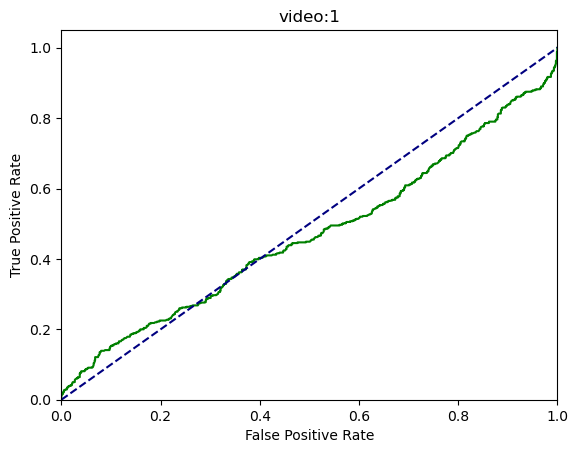

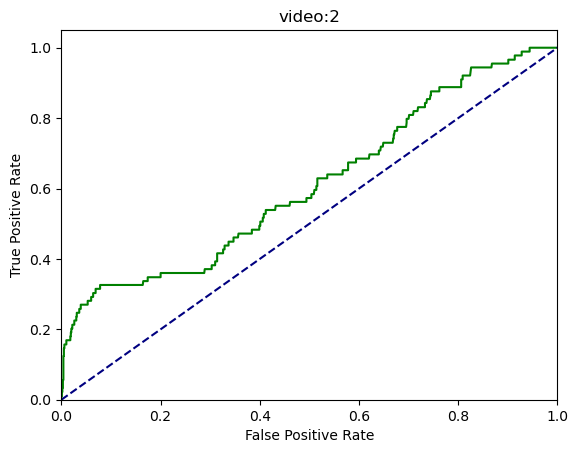

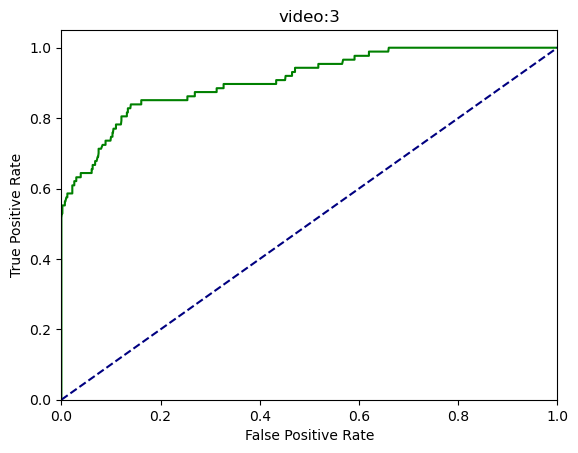

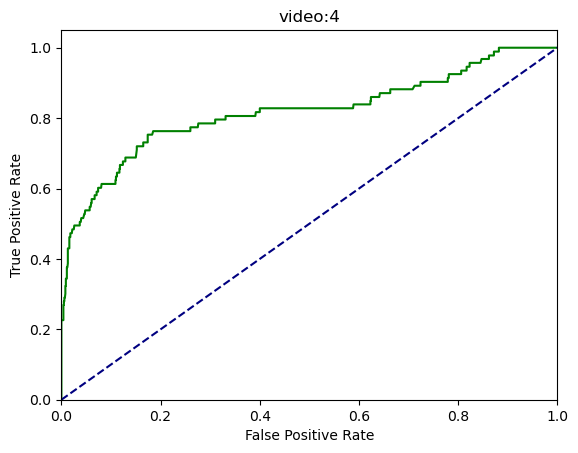

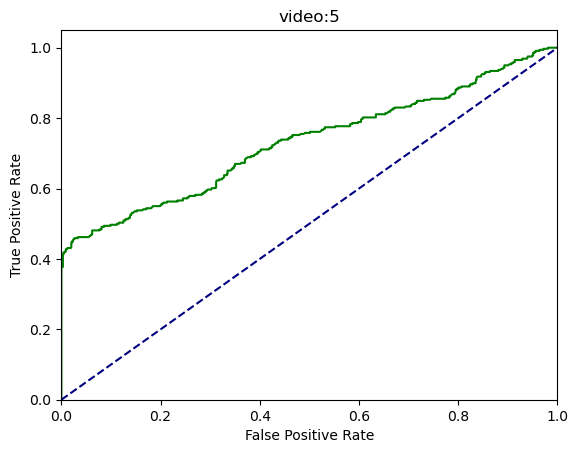

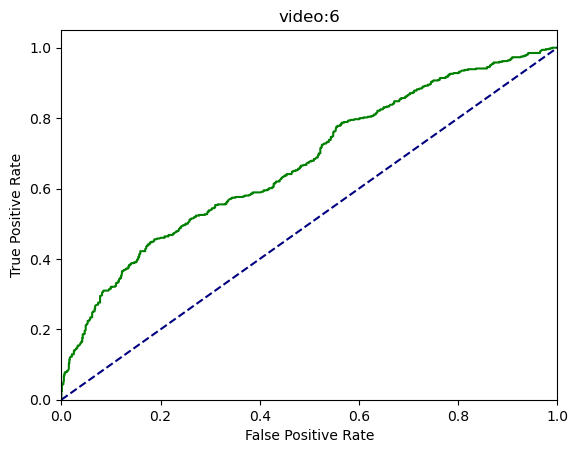

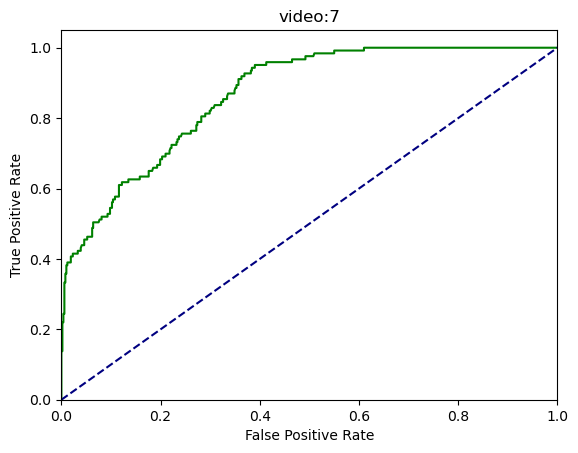

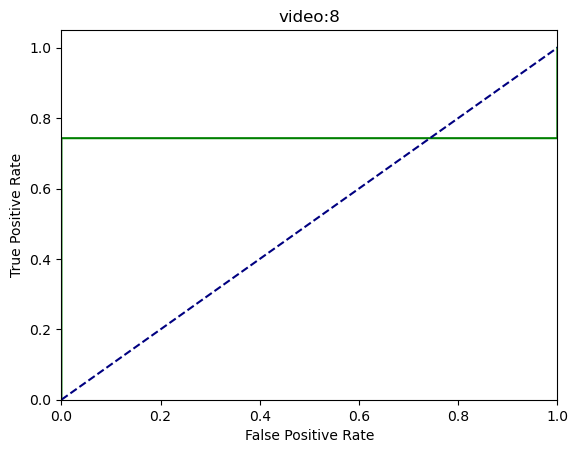

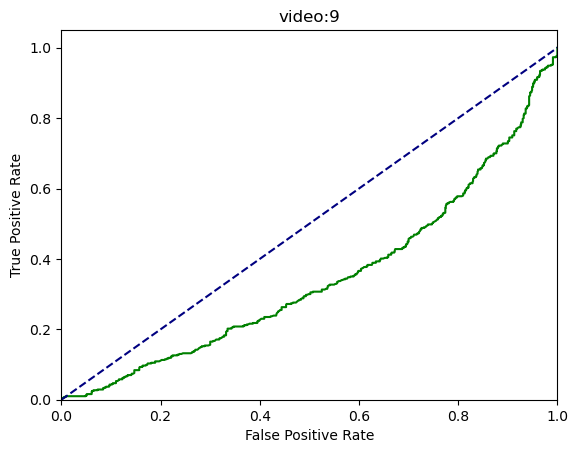

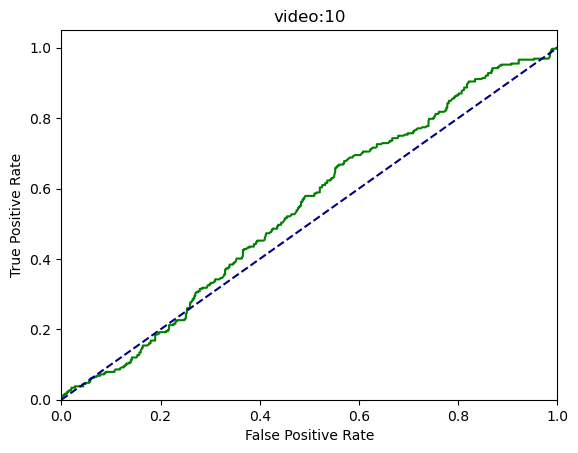

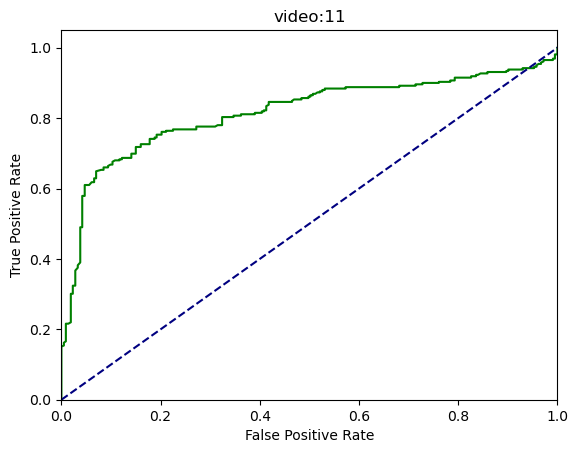

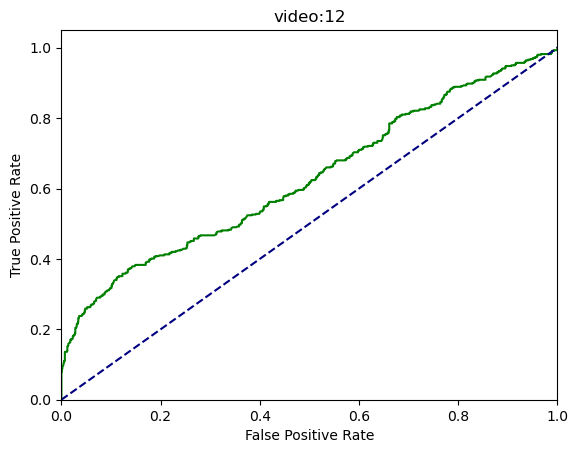

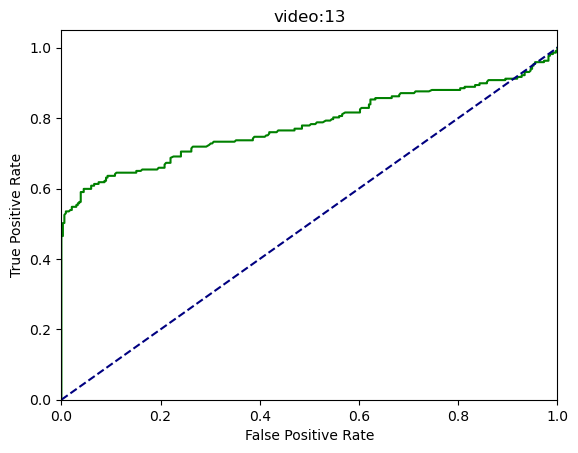

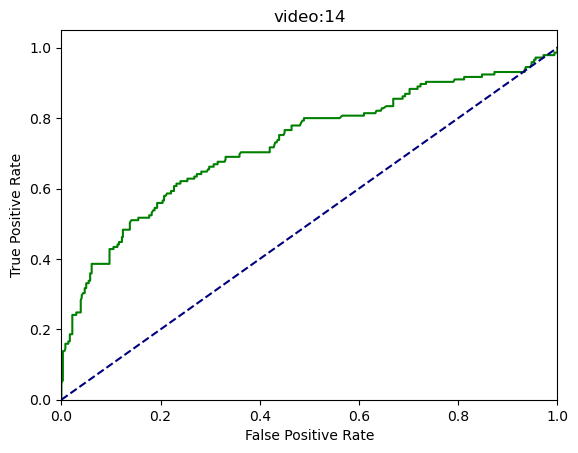

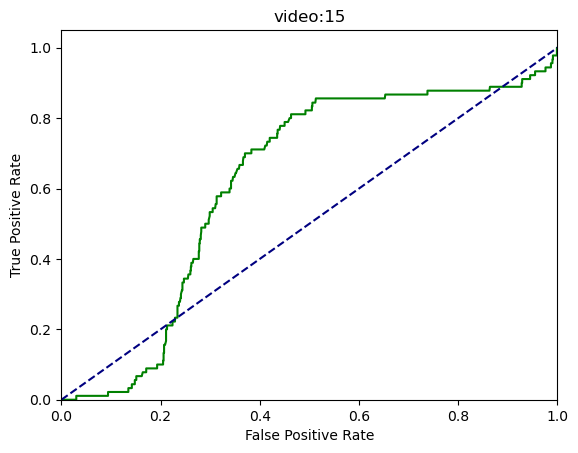

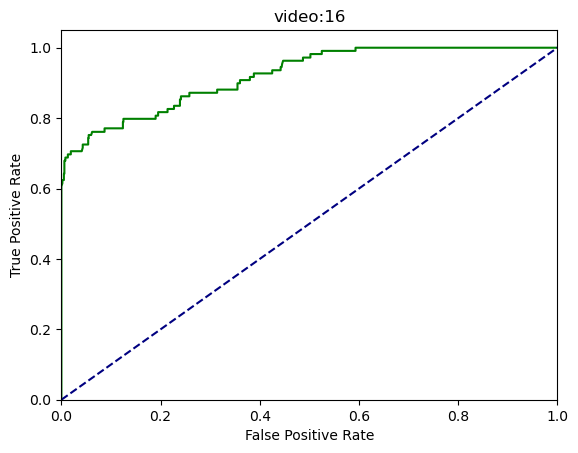

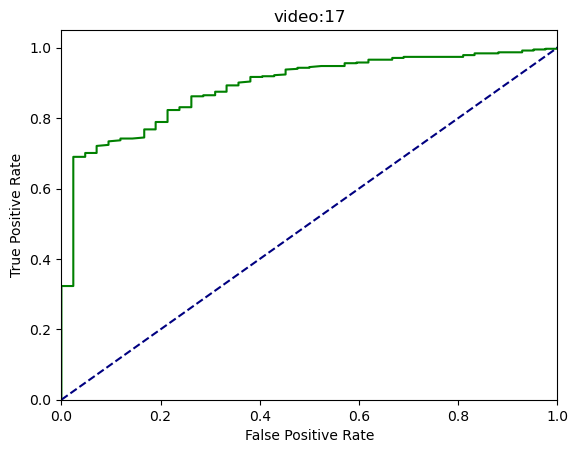

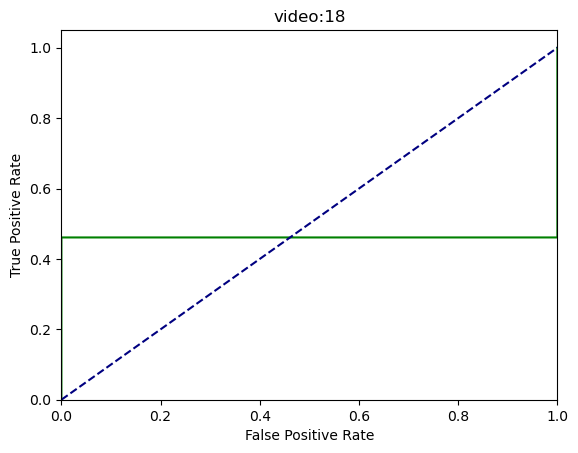

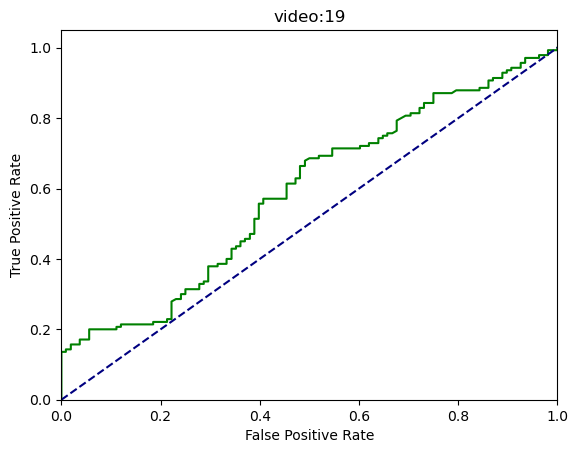

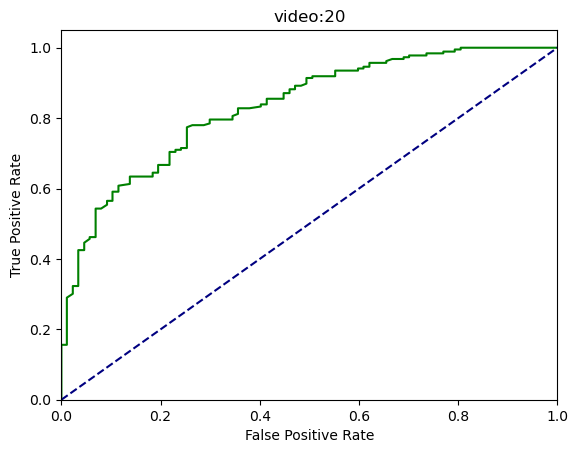

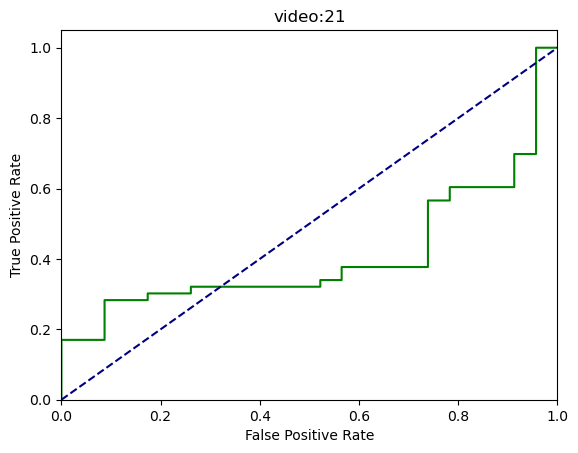

In [5]:
pred_list_all = []
true_list_all = []
for i in range(21):
    image_input, true_list = get_data()
    pred_list = get_result(image_input)
    print(f'{i + 1}/21')
    get_auroc(true_list, pred_list, f'video:{i + 1}')
    pred_list_all.extend(pred_list)
    true_list_all.extend(true_list)

# image_input, true_list = get_data('05')
# pred_list = get_result(image_input)
# get_auroc(true_list, pred_list,f'video:8')
# pred_list_all.extend(pred_list)
# true_list_all.extend(true_list)

15324 15324
AUC :  0.671


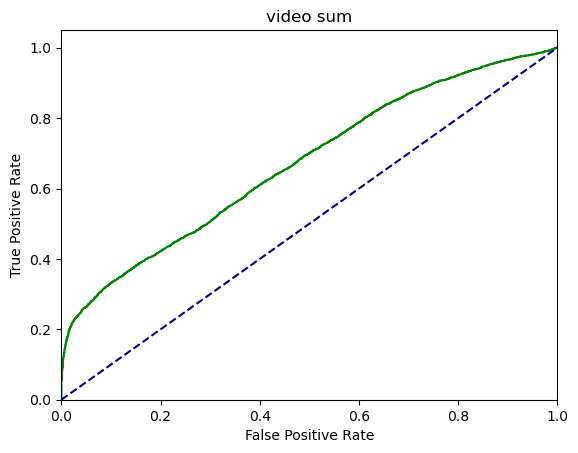

In [6]:
# pred_list = [x[0] for x in pred_list]
# get_auroc(true_list, Standard_data)
get_auroc(true_list_all, pred_list_all, f'video sum')